
# PHASE 2 PROJECT.

## Business Understanding
### The film industry is a dynamic global market, encompassing all stages of movie production and distribution and exerting significant cultural and economic influence. As more companies venture into original content creation, understanding which films resonate with audiences is crucial. Analyzing box office trends enables newcomers to identify popular genres, profitable themes, and audience preferences, guiding strategic production choices. This data-driven approach empowers new studios to craft compelling content that aligns with viewer interests, enhancing their potential to make a lasting impact in an increasingly competitive industry.

## Business Problem
### ABC Company has observed that major corporations are increasingly investing in original video content, and they’re eager to join in. They’ve decided to establish a new movie studio but lack experience in film production. Your role is to analyze current box office trends to determine which types of films are performing best. You will then translate these findings into actionable insights for the head of the new movie studio, helping guide strategic decisions on the types of films to produce.

## Data Understanding
### 1. Import the required libraries.
### 2. Load the necessary data, inspecting and understanding the data.

## Data preparation
### Data Cleaning

## Data analysis
### 1.EDA
### 2.Descriptive Statistics
### 3. Variable Relationships
### 3. Statistical Distribution
### 4. Inferential Analysis
### 5. Hypothesis Testing

## Conclusion

## Recommendation

## 1.Import the required Libraries.

In [2087]:
# import the required libraries.
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from collections import defaultdict
from scipy.stats import linregress
import pickle

## 2.Load the necessary data, inspecting and understanding the data.

In [2088]:
#Loading bom.movie_gross.csv.gz, displaying the first five rows of the data set and get a summary of information the data set.
bom = pd.read_csv('bom.movie_gross.csv.gz')
bom.head()
bom.info()
bom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [2089]:

# To display the last five rows of the data.
bom.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [2090]:
# To check the shape of the data.
rows=bom.shape[0]
columns=bom.shape[1]
print(f"Bom data set has {rows} rows and {columns} columns")

Bom data set has 3387 rows and 5 columns


In [2091]:
# To display the columns of the data.
bom.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [2092]:
#To check the descriptive statistics for the columns of the bom data.
bom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


 ## 3.Data Cleaning.

### 3.1 Checking for missing values.

In [2093]:
# Checking for missing values.
missing_bom=bom.isnull().sum()
print(type(missing_bom))
print(missing_bom)

<class 'pandas.core.series.Series'>
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


The missing values are as follows: 
* Title: 0
* Studio: 5
* Domestic gross: 28
* Foreign gross: 1350
* Year: 0



### 3.2 Determine the data type of the columns in the data set.

In [2094]:
# Check for all the numerical columns 
numerical_columns = bom.select_dtypes(include=['number']).columns
print(f"The numerical columns include: {numerical_columns}")

The numerical columns include: Index(['domestic_gross', 'year'], dtype='object')


In [2095]:
# Check for the categorical columns.
categorical_columns = bom.select_dtypes(include=['object', 'category']).columns
print(f"The categorical columns include: {categorical_columns}")

The categorical columns include: Index(['title', 'studio', 'foreign_gross'], dtype='object')


### Create a copy for the data set to perform the data cleaning.

In [2096]:
# Creating a copy of the original data set.
bom_clean = bom.copy()
bom_clean

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [2097]:
bom_clean.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [2098]:
# drop missing values in every colum 
for column in bom_clean.columns:
   bom_clean = bom_clean.dropna(subset=[column])

bom_clean.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [2099]:
bom_clean.head()
bom_clean.info()
bom_clean

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


### 3.4 Renaming the columns in the clean data set.

In [2100]:
# Rename the column.
bom_clean= bom_clean.rename(columns={'title': 'movie title'})
bom_clean.head()

,movie title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [2101]:
# Convert foreign gross from string to numeric
bom_clean['foreign_gross'] = pd.to_numeric(bom_clean['foreign_gross'], errors='coerce') 
bom_clean.head(2)

,movie title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010


In [2102]:
# Combine columns  to create new coluumn
bom_clean['total_gross'] = bom_clean['domestic_gross'] + bom_clean['foreign_gross']
bom_clean.head(2)

,movie title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09


In [2103]:
bom_clean = bom_clean.dropna(subset=['total_gross'])


### 3.5 Checking for duplicates in the clean data set.

In [2104]:
# checking how many duplicate rows exist in our DataFrame
bom_clean.duplicated().sum()

0

### Since there are no duplicates we will continue to the next step of data cleaning.

### 3.6 Checking for outliers and handling the outliers in the numerical columns.
### * Check for outliers using the following methods:Visualizations (box plots) or the IQR method.
### * Then treat outliers through: cap, remove, or adjust.

### Check for outliers in all numerical columns using the IQR(Interquartile Range).

In [2105]:
# Check for all the numerical columns 
numerical_columns = bom_clean.select_dtypes(include=['number']).columns
print(f"The numerical columns include: {numerical_columns}")

The numerical columns include: Index(['domestic_gross', 'foreign_gross', 'year', 'total_gross'], dtype='object')


In [2106]:
# List of numerical columns in the dataset
numerical_columns = ['domestic_gross','foreign_gross', 'year', 'total_gross']

# Defining a function to check and count outliers using the IQR method
def check_outliers_iqr(bom_clean, numerical_columns):
    outliers_count = {}
    for column in numerical_columns:
        # Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR
        Q1 = bom_clean[column].quantile(0.25)
        Q3 = bom_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify and count outliers
        outliers = bom_clean[(bom_clean[column] < lower_bound) | (bom_clean[column] > upper_bound)]
        outliers_count[column] = len(outliers)  # Store outliers count for each column
    
    return outliers_count

# Get the count of outliers in each numerical column
outliers_count = check_outliers_iqr(bom_clean, numerical_columns)

# Print the outliers count for each column
for column, count in outliers_count.items():
    print(f"Outliers in '{column}': {count}")


Outliers in 'domestic_gross': 178
Outliers in 'foreign_gross': 253
Outliers in 'year': 0
Outliers in 'total_gross': 216


### Visualize the distribution of data with box plots for each numerical feature to confirm the outliers visually.

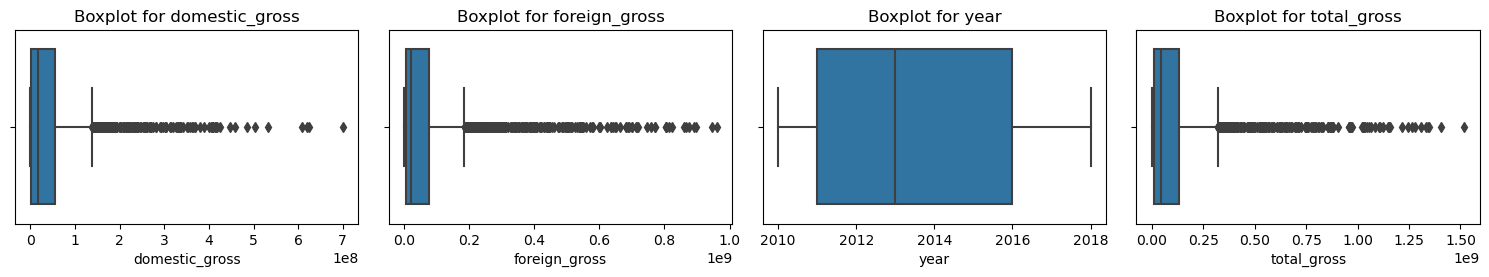

In [2107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)  # Adjust the grid size if you have more than 16 features
    sns.boxplot(x=bom_clean[column])
    plt.title(f'Boxplot for {column}')
plt.tight_layout()
plt.show()

### Handling the outliers in the numerical columns using capping or winsorization.

In [2108]:
# Defining a function to cap the outliers.

def cap_outliers(bom_clean, column, lower_percentile=0.01, upper_percentile=0.99):
    for col in column:
        lower_cap = bom_clean[col].quantile(lower_percentile)  # 1st percentile
        upper_cap = bom_clean[col].quantile(upper_percentile)  # 99th percentile
        bom_clean[col] = bom_clean[col].clip(lower=lower_cap, upper=upper_cap)
    return bom_clean

# List of features to apply capping
column_to_cap = ['domestic_gross','foreign_gross','total_gross']

# Apply capping
bom_clean= cap_outliers(bom_clean, column_to_cap)

# Check if capping was applied successfully
print(bom_clean[column_to_cap].describe(percentiles=[0.01, 0.99]))


       domestic_gross  foreign_gross   total_gross
count    2.002000e+03   2.002000e+03  2.002000e+03
mean     4.467382e+07   7.485974e+07  1.198928e+08
std      7.049709e+07   1.324566e+08  1.968330e+08
min      3.201000e+03   1.270500e+04  5.566900e+04
1%       3.201990e+03   1.270995e+04  5.573731e+04
50%      1.640000e+07   1.960000e+07  4.220000e+07
99%      3.683940e+08   6.998269e+08  1.034677e+09
max      3.683970e+08   6.999130e+08  1.034738e+09


### Plot a box plot to check if the outliers have been removed succesfully.

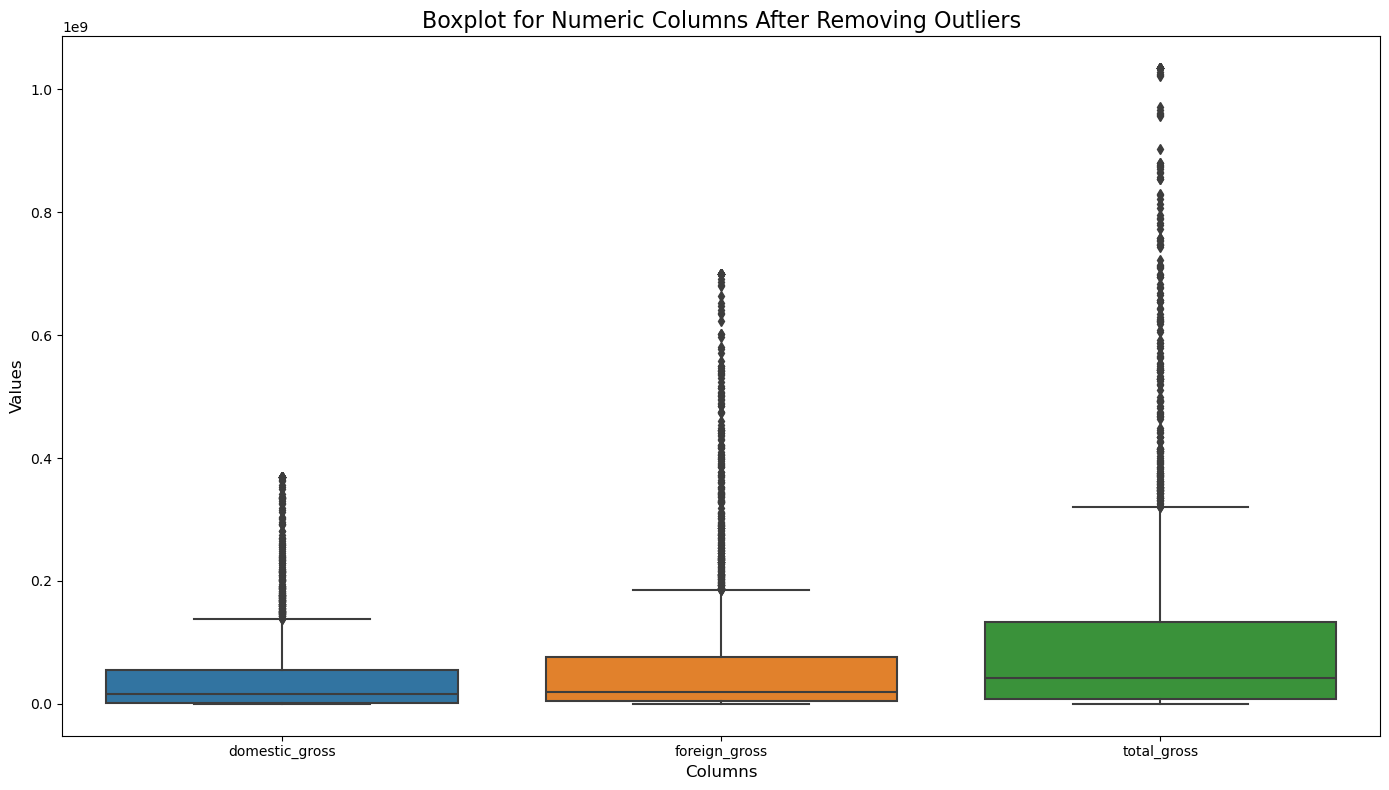

In [2109]:
# Define the numeric columns you want to plot
numeric_columns = ['domestic_gross','foreign_gross','total_gross']
# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Create the boxplot using Seaborn
sns.boxplot(data=bom_clean[numeric_columns])

# Add title and labels
plt.title('Boxplot for Numeric Columns After Removing Outliers', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

### 3.7 Checking for inconsistency and unique values in the categorical columns, standardizing the rare values, handling the rare categories.

### Check for inconsistent categories in the categorical columns inorder to standardize the categorical labels.

In [2110]:
# Check for the categorical columns.
categorical_columns = bom_clean.select_dtypes(include=['object', 'category']).columns
print(f"The categorical columns include: {categorical_columns}")

The categorical columns include: Index(['movie title', 'studio'], dtype='object')


In [2111]:
# List of the categorical columns in the dataset
categorical_columns = ['movie title','studio']

# Check the Unique Values using for loops in order to identify inconsistencies or unusual categories in the dataset.
for column in categorical_columns:
    print(f"Unique values in '{column}':\n{bom_clean[column].unique()}\n")

Unique values in 'movie title':
['Toy Story 3' 'Alice in Wonderland (2010)'
 'Harry Potter and the Deathly Hallows Part 1' ... 'Time Freak'
 'Reign of Judges: Title of Liberty - Concept Short'
 'Antonio Lopez 1970: Sex Fashion & Disco']

Unique values in 'studio':
['BV' 'WB' 'P/DW' 'Sum.' 'Par.' 'Uni.' 'Fox' 'Wein.' 'Sony' 'FoxS' 'SGem'
 'WB (NL)' 'LGF' 'MBox' 'CL' 'W/Dim.' 'CBS' 'Focus' 'MGM' 'Over.' 'Mira.'
 'IFC' 'CJ' 'NM' 'SPC' 'ParV' 'Gold.' 'JS' 'RAtt.' 'Magn.' 'Free' '3D'
 'UTV' 'Rela.' 'Zeit.' 'Anch.' 'PDA' 'Lorb.' 'App.' 'Drft.' 'Osci.' 'IW'
 'Rog.' 'Eros' 'Relbig.' 'Viv.' 'Hann.' 'Strand' 'NGE' 'Scre.' 'Kino'
 'Abr.' 'CZ' 'ATO' 'First' 'GK' 'FInd.' 'NFC' 'TFC' 'Pala.' 'Imag.' 'NAV'
 'Arth.' 'CLS' 'Mont.' 'Olive' 'CGld' 'FOAK' 'IVP' 'Yash' 'ICir' 'WOW'
 'FM' 'FD' 'Vari.' 'TriS' 'ORF' 'IM' 'Elev.' 'Cohen' 'NeoC' 'Jan.' 'MNE'
 'Trib.' 'Vita.' 'Rocket' 'OMNI/FSR' 'KKM' 'Argo.' 'Libre' 'FRun' 'P4'
 'KC' 'MPFT' 'Icar.' 'AGF' 'NYer' 'LG/S' 'WHE' 'WGUSA' 'MPI' 'RTWC' 'FIP'
 'RF' 'KL'

In [2112]:
# Standardizing Values which  strip spaces, convert to lowercase for uniformity
bom_clean['movie title'] = bom_clean['movie title'].str.strip().str.lower()
bom_clean['studio'] = bom_clean['studio'].str.strip().str.lower()


# Then re-check unique values after standardization
for column in ['movie title', 'studio']:
    print(f"Unique values after standardization in '{column}':\n{bom_clean[column].unique()}\n")

Unique values after standardization in 'movie title':
['toy story 3' 'alice in wonderland (2010)'
 'harry potter and the deathly hallows part 1' ... 'time freak'
 'reign of judges: title of liberty - concept short'
 'antonio lopez 1970: sex fashion & disco']

Unique values after standardization in 'studio':
['bv' 'wb' 'p/dw' 'sum.' 'par.' 'uni.' 'fox' 'wein.' 'sony' 'foxs' 'sgem'
 'wb (nl)' 'lgf' 'mbox' 'cl' 'w/dim.' 'cbs' 'focus' 'mgm' 'over.' 'mira.'
 'ifc' 'cj' 'nm' 'spc' 'parv' 'gold.' 'js' 'ratt.' 'magn.' 'free' '3d'
 'utv' 'rela.' 'zeit.' 'anch.' 'pda' 'lorb.' 'app.' 'drft.' 'osci.' 'iw'
 'rog.' 'eros' 'relbig.' 'viv.' 'hann.' 'strand' 'nge' 'scre.' 'kino'
 'abr.' 'cz' 'ato' 'first' 'gk' 'find.' 'nfc' 'tfc' 'pala.' 'imag.' 'nav'
 'arth.' 'cls' 'mont.' 'olive' 'cgld' 'foak' 'ivp' 'yash' 'icir' 'wow'
 'fm' 'fd' 'vari.' 'tris' 'orf' 'im' 'elev.' 'cohen' 'neoc' 'jan.' 'mne'
 'trib.' 'vita.' 'rocket' 'omni/fsr' 'kkm' 'argo.' 'libre' 'frun' 'p4'
 'kc' 'mpft' 'icar.' 'agf' 'nyer' 'lg/s'

In [2113]:
# Handling Rare Categories.
# Check frequency distribution and handle rare values for  'studio'
for column in [ 'studio']:
    print(f"Value counts in '{column}':\n{bom_clean[column].value_counts()}\n")
    # Example threshold: Categories with less than 5 occurrences
    category_counts = bom_clean[column].value_counts()
    rare_categories = category_counts[category_counts < 5].index
    bom_clean[column] = bom_clean[column].replace(rare_categories, 'other')

    # Re-check unique values after handling rare categories
    print(f"Unique values in '{column}' after handling rare categories:\n{bom_clean[column].unique()}\n")

Value counts in 'studio':
studio
uni.            141
fox             134
wb              130
sony            105
bv              102
               ... 
agf               1
icar.             1
mpft              1
kc                1
darin southa      1
Name: count, Length: 172, dtype: int64

Unique values in 'studio' after handling rare categories:
['bv' 'wb' 'p/dw' 'sum.' 'par.' 'uni.' 'fox' 'wein.' 'sony' 'foxs' 'sgem'
 'wb (nl)' 'lgf' 'mbox' 'cl' 'w/dim.' 'cbs' 'focus' 'other' 'over.' 'ifc'
 'cj' 'spc' 'gold.' 'ratt.' 'magn.' 'free' 'utv' 'rela.' 'zeit.' 'anch.'
 'lorb.' 'drft.' 'osci.' 'eros' 'strand' 'nge' 'kino' 'gk' 'yash' 'fm'
 'fd' 'vari.' 'tris' 'orf' 'elev.' 'cohen' 'mne' 'frun' 'lg/s' 'wgusa'
 'rtwc' 'fip' 'kl' 'eone' 'a24' 'stx' 'bst' 'amazon' 'annapurna']



### 3.8 Strip white spaces in all the column elements.

In [2114]:
# We can use the str.strip function on colunms to strip the leading and trailing spaces
bom_clean.columns=bom_clean.columns.str.strip()


In [2115]:
bom_clean.head()

,movie title,studio,domestic_gross,foreign_gross,year,total_gross
0,toy story 3,bv,368397000.0,652000000.0,2010,1.034738e+09
1,alice in wonderland (2010),bv,334200000.0,691300000.0,2010,1.025500e+09
2,harry potter and the deathly hallows part 1,wb,296000000.0,664300000.0,2010,9.603000e+08
3,inception,wb,292600000.0,535700000.0,2010,8.283000e+08
4,shrek forever after,p/dw,238700000.0,513900000.0,2010,7.526000e+08


In [2116]:
bom_clean.tail()

,movie title,studio,domestic_gross,foreign_gross,year,total_gross
3275,i still see you,lgf,3201.0,1500000.0,2018,1501400.0
3286,the catcher was a spy,ifc,725000.0,229000.0,2018,954000.0
3309,time freak,other,10000.0,256000.0,2018,266000.0
3342,reign of judges: title of liberty - concept short,other,93200.0,12705.0,2018,98400.0
3353,antonio lopez 1970: sex fashion & disco,fm,43200.0,30000.0,2018,73200.0


In [2117]:
bom_clean.shape

(2002, 6)

### N:B Save the cleaned data set as a CSV file.

In [2118]:
bom_clean.to_csv("Clean_bom.movie_Data.csv",index=False)

## 4. Exploratory Data Analysis.

### Aggregate analysis

In [2119]:
movie_title_counts = bom_clean['movie title'].value_counts().head(10)
movie_title_counts

movie title
toy story 3                         1
insidious chapter 3                 1
poltergeist (2015)                  1
spotlight                           1
the visit                           1
devil and angel (e gun tian shi)    1
black mass                          1
joy                                 1
chappie                             1
vacation                            1
Name: count, dtype: int64

In [2120]:
domestic_gross_counts= bom_clean['domestic_gross'].value_counts().head(10)
domestic_gross_counts

domestic_gross
368397000.0    21
3201.0         21
1500000.0      14
1000000.0      13
1300000.0      12
1100000.0      11
2000000.0      10
1600000.0      10
1400000.0      10
2600000.0       8
Name: count, dtype: int64

In [2121]:
foreign_gross_counts= bom_clean['foreign_gross'].value_counts().head(10)
foreign_gross_counts

foreign_gross
1200000.0      23
699913000.0    21
12705.0        21
1100000.0      13
4200000.0      12
2500000.0      11
1900000.0      11
1300000.0      10
2000000.0      10
2600000.0      10
Name: count, dtype: int64

In [2122]:
studio_counts= bom_clean['studio'].value_counts().head(10)
studio_counts

studio
other    186
uni.     141
fox      134
wb       130
sony     105
bv       102
par.      94
lgf       87
wein.     69
ifc       68
Name: count, dtype: int64

In [2123]:
year_counts= bom_clean['year'].value_counts().head(10)
year_counts

year
2010    308
2011    290
2012    243
2014    234
2013    200
2016    192
2015    187
2017    176
2018    172
Name: count, dtype: int64

In [2124]:
total_gross_counts= bom_clean['total_gross'].value_counts().head(10)
total_gross_counts

total_gross
1.034738e+09    21
5.566900e+04    21
7.900000e+06     5
1.690000e+07     5
1.540000e+07     5
2.740000e+07     5
5.500000e+06     4
1.960000e+07     4
1.310000e+07     4
9.100000e+06     4
Name: count, dtype: int64

## Calculate the mean, median and standard deviation for the following numerical columns: 'domestic_gross','foreign_gross', 'year', 'total_gross'

In [2125]:
mean_domestic_gross = bom_clean['domestic_gross'].mean()
mean_domestic_gross 

44673820.98201798

In [2126]:
median_domestic_gross = bom_clean['domestic_gross'].median()
median_domestic_gross 

16399999.0

In [2127]:
std_domestic_gross = bom_clean['domestic_gross'].std()
std_domestic_gross 

70497094.39806508

In [2128]:
mean_year= bom_clean['year'].mean()
mean_year 

2013.5

In [2129]:
median_year= bom_clean['year'].median()
median_year 

2013.0

In [2130]:
std_year= bom_clean['year'].std()
std_year 

2.5974750358221232

In [2131]:
mean_foreign_gross = bom_clean['foreign_gross'].mean()
mean_foreign_gross 

74859735.95804195

In [2132]:
median_foreign_gross = bom_clean['foreign_gross'].median()
median_foreign_gross 

19600000.0

In [2133]:
std_foreign_gross = bom_clean['foreign_gross'].std()
std_foreign_gross 

132456638.62469716

In [2134]:
mean_total_gross = bom_clean['total_gross'].mean()
mean_total_gross 

119892831.17732267

In [2135]:
median_total_gross = bom_clean['total_gross'].median()
median_total_gross 

42200000.0

In [2136]:
std_foreign_gross = bom_clean['total_gross'].std()
std_foreign_gross 

196832951.3271825

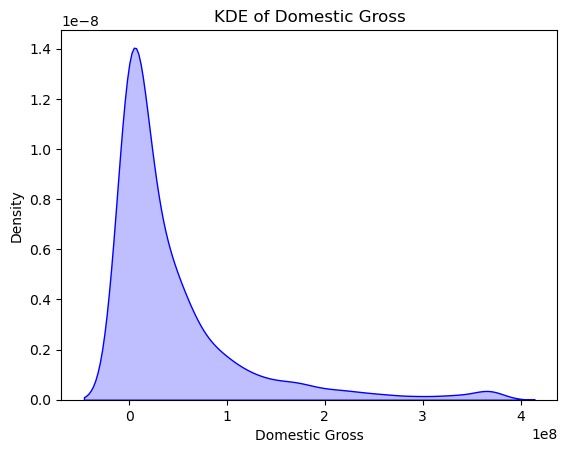

In [2137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot KDE for 'domestic_gross'
sns.kdeplot(data=bom_clean, x='domestic_gross', fill=True, color='blue')
plt.title('KDE of Domestic Gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Density')
plt.show()

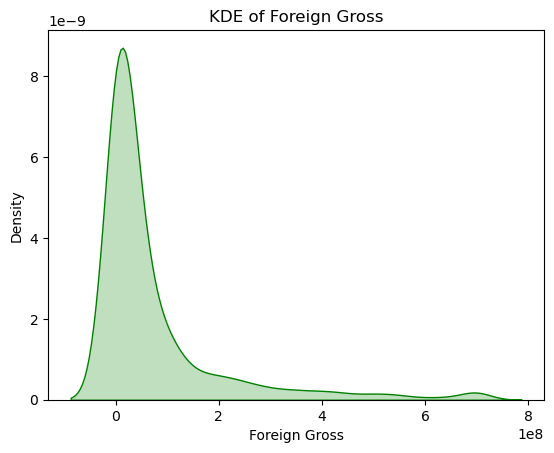

In [2138]:
# Plot KDE for 'Foreign_gross'
sns.kdeplot(data=bom_clean, x='foreign_gross', fill=True, color='green')
plt.title('KDE of Foreign Gross')
plt.xlabel('Foreign Gross')
plt.ylabel('Density')
plt.show()

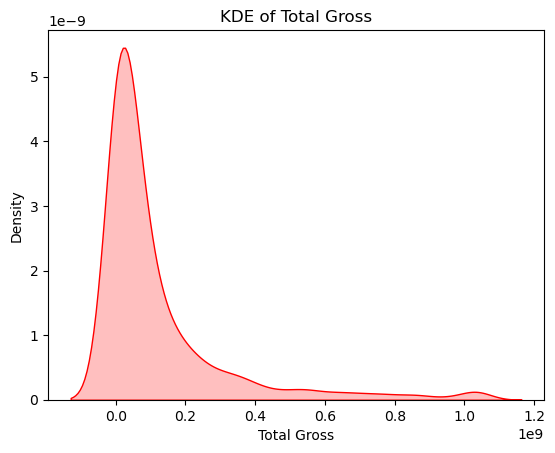

In [2139]:
# Plot KDE for 'total_gross'
sns.kdeplot(data=bom_clean, x='total_gross', fill=True, color='red')
plt.title('KDE of Total Gross')
plt.xlabel('Total Gross')
plt.ylabel('Density')
plt.show()

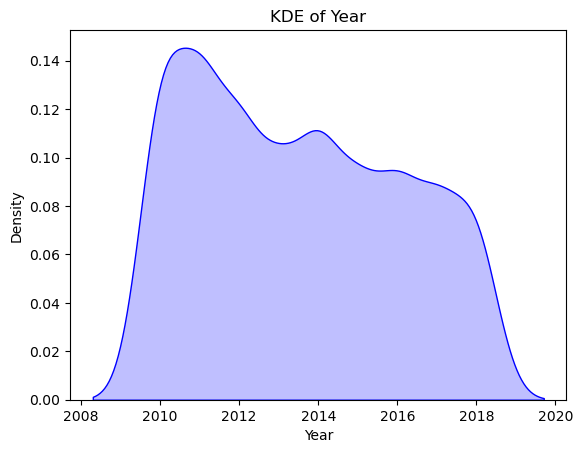

In [2140]:
# Plot KDE for 'year'
sns.kdeplot(data=bom_clean, x='year', fill=True, color='blue')
plt.title('KDE of Year')
plt.xlabel('Year')
plt.ylabel('Density')
plt.show()

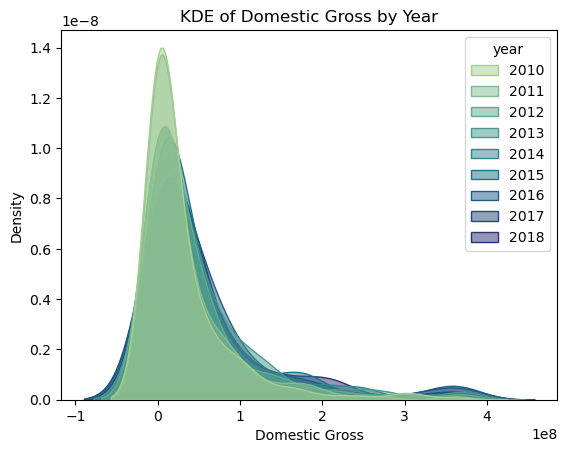

In [2141]:
# KDE plot for comparing domestic gross vs year.
sns.kdeplot(data=bom_clean, x='domestic_gross', hue='year', fill=True, common_norm=False, alpha=0.5, palette='crest')
plt.title('KDE of Domestic Gross by Year')
plt.xlabel('Domestic Gross')
plt.ylabel('Density')
plt.show()

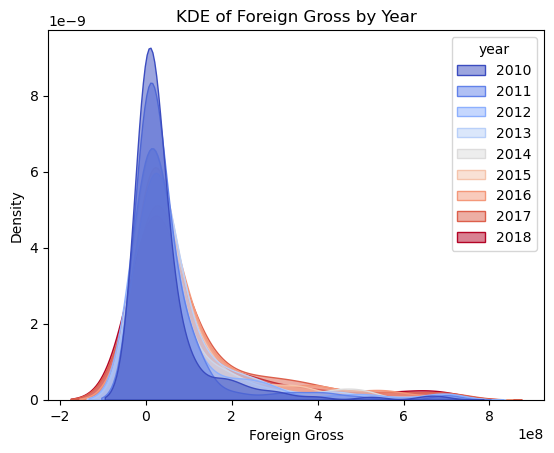

In [2142]:
# KDE plot for comparing foreign gross vs year.
sns.kdeplot(data=bom_clean, x='foreign_gross', hue='year', fill=True, common_norm=False, alpha=0.5, palette='coolwarm')
plt.title('KDE of Foreign Gross by Year')
plt.xlabel('Foreign Gross')
plt.ylabel('Density')
plt.show()

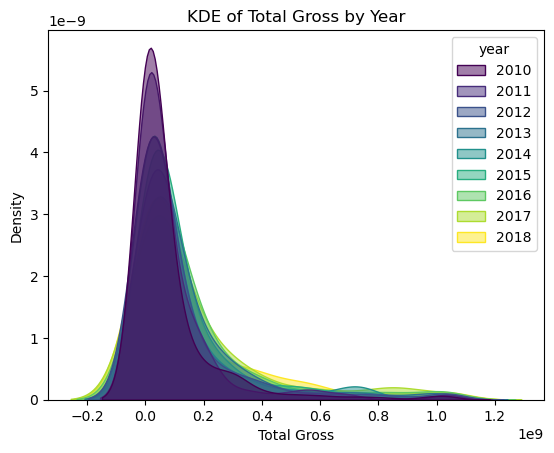

In [2143]:
# KDE plot for comparing total gross vs year.
sns.kdeplot(data=bom_clean, x='total_gross', hue='year', fill=True, common_norm=False, alpha=0.5, palette='viridis')
plt.title('KDE of Total Gross by Year')
plt.xlabel('Total Gross')
plt.ylabel('Density')
plt.show()

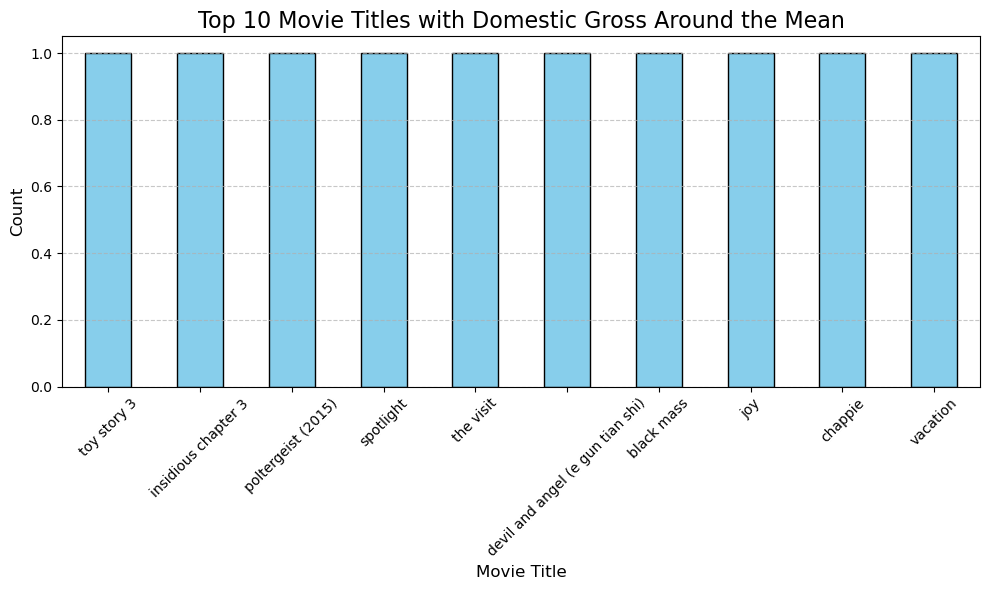

In [2144]:
# Calculate the mean domestic gross.
mean_domestic_gross = bom_clean['domestic_gross'].mean()

movie_title_counts = bom_clean['movie title'].value_counts().head(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
movie_title_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Movie Titles with Domestic Gross Around the Mean', fontsize=16)
plt.xlabel('Movie Title', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

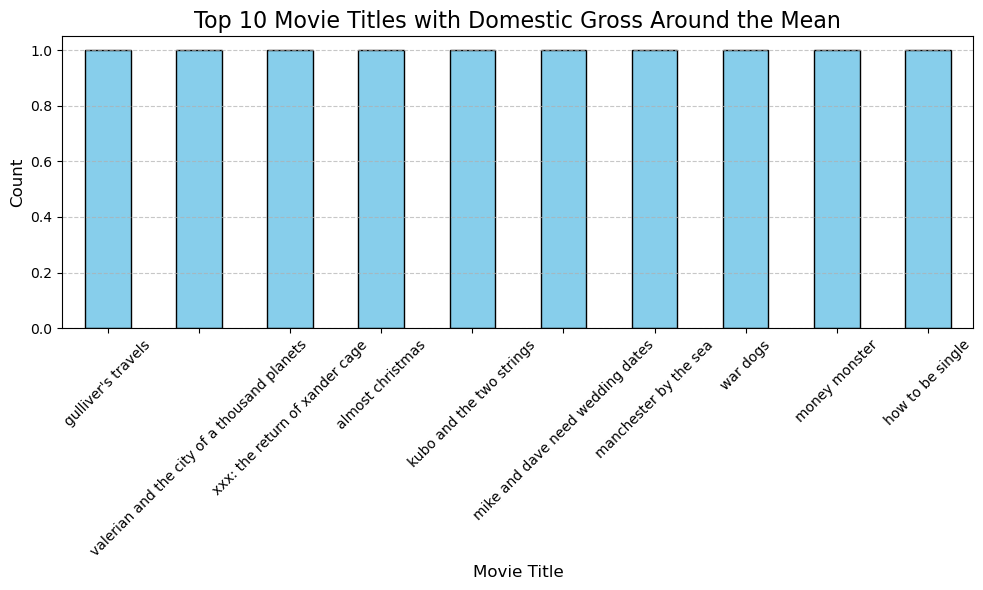

In [2145]:
# Refined code  with filtered rows where domestic gross is close to mean.
# Calculate the mean domestic gross
mean_domestic_gross = bom_clean['domestic_gross'].mean()

# Filter the rows where domestic_gross is close to the mean 
threshold = 0.1  # This is the 10% threshold around the mean
filtered_bom = bom_clean[
    (bom_clean['domestic_gross'] >= mean_domestic_gross * (1 - threshold)) &
    (bom_clean['domestic_gross'] <= mean_domestic_gross * (1 + threshold))
]

# The top 10 movie titles based on filtered data
movie_title_counts = filtered_bom['movie title'].value_counts().head(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
movie_title_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Movie Titles with Domestic Gross Around the Mean', fontsize=16)
plt.xlabel('Movie Title', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



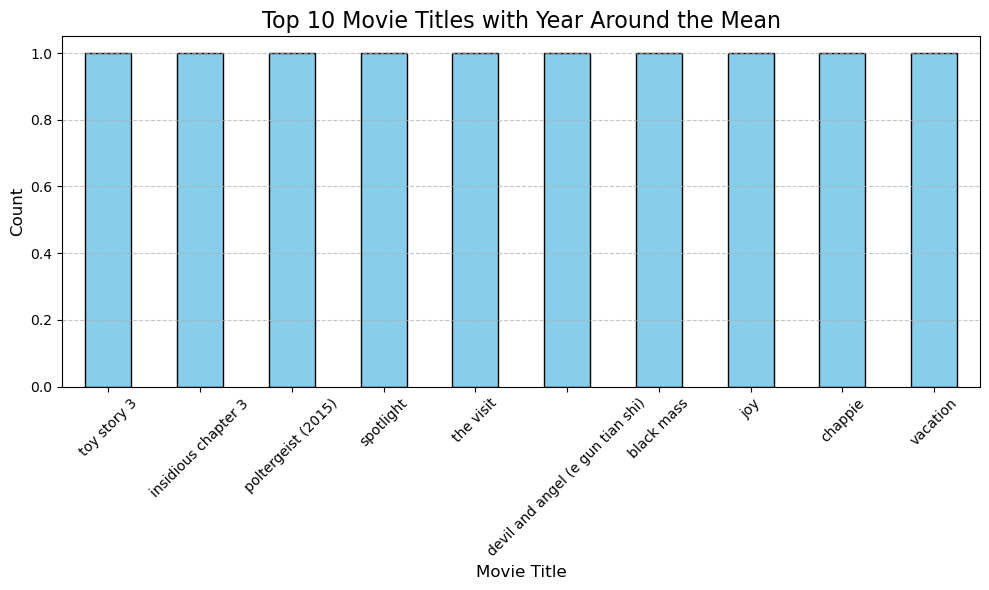

In [2146]:
# Calculate the mean domestic gross.
mean_year = bom_clean['year'].mean()

movie_title_counts = bom_clean['movie title'].value_counts().head(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
movie_title_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Movie Titles with Year Around the Mean', fontsize=16)
plt.xlabel('Movie Title', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

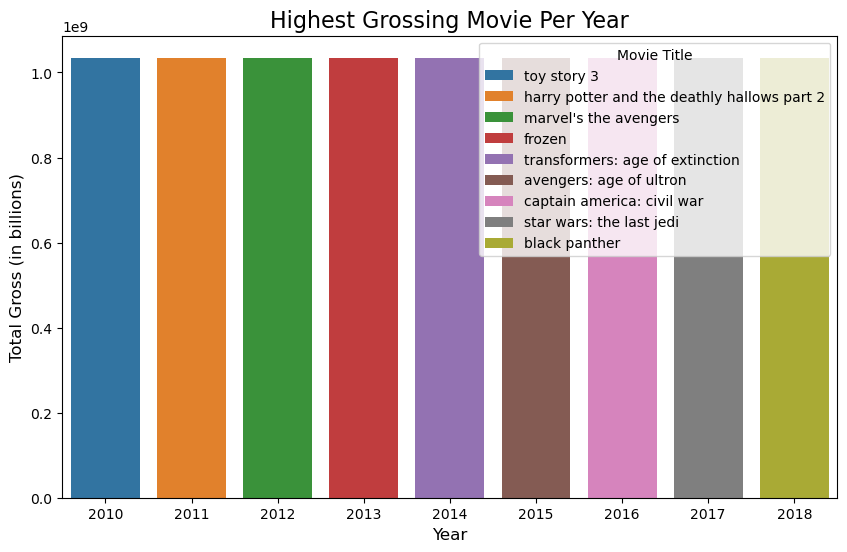

In [2147]:

# Find the movie with the highest gross per year
highest_gross_per_year = bom_clean.loc[bom_clean.groupby('year')['total_gross'].idxmax()]

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    data=highest_gross_per_year,
    x='year',
    y='total_gross',
    hue='movie title',
    dodge=False
)
plt.title('Highest Grossing Movie Per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Gross (in billions)', fontsize=12)
plt.legend(title='Movie Title')
plt.show()


The highest grossing movie per year from 2010-2018 as follows:  
* 2010: Toy story 3
* 2011: Harry Potter and the Deathly Hallows part 2
* 2012: Marvel's the Avengers
* 2013: Frozen
* 2014: Transformers: Age of Extinction
* 2015: Avengers: A ge of Ultron
* 2016: Captain America: Civil War
* 2017: Star Wars: The Last Jedi 
* 2018: Black Panther

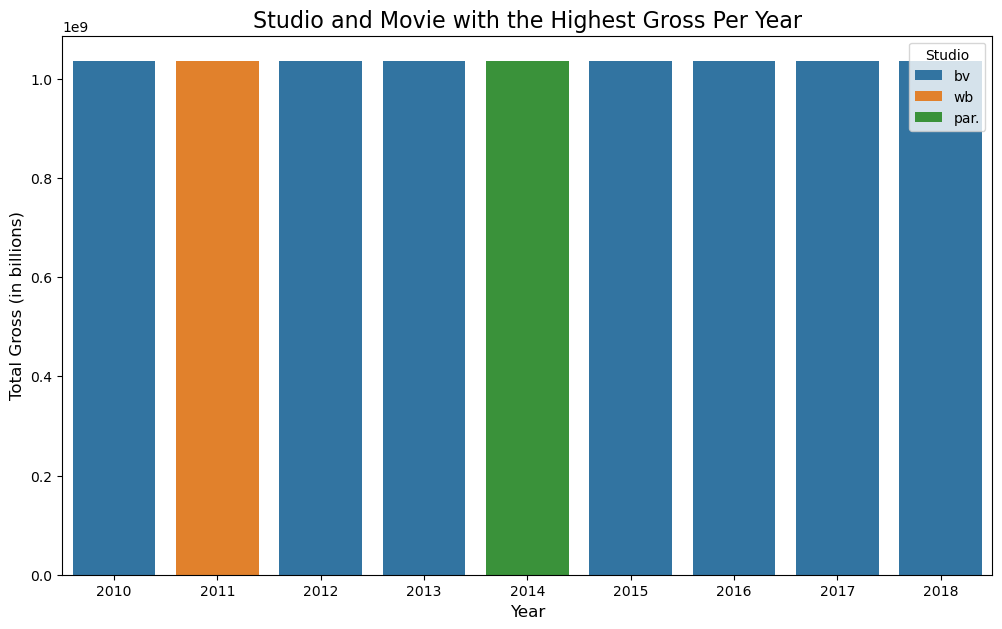

      year studio                                  movie title   total_gross
0     2010     bv                                  toy story 3  1.034738e+09
328   2011     wb  harry potter and the deathly hallows part 2  1.034738e+09
727   2012     bv                        marvel's the avengers  1.034738e+09
1127  2013     bv                                       frozen  1.034738e+09
1477  2014   par.              transformers: age of extinction  1.034738e+09
1875  2015     bv                      avengers: age of ultron  1.034738e+09
2322  2016     bv                   captain america: civil war  1.034738e+09
2758  2017     bv                     star wars: the last jedi  1.034738e+09
3080  2018     bv                                black panther  1.034738e+09


In [2148]:

# Find the movie and studio with the highest gross per year
highest_gross_per_year = bom_clean.loc[bom_clean.groupby('year')['total_gross'].idxmax()]

# Plot using seaborn
plt.figure(figsize=(12, 7))
sns.barplot(
    data=highest_gross_per_year,
    x='year',
    y='total_gross',
    hue='studio',
    dodge=False
)
plt.title('Studio and Movie with the Highest Gross Per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Gross (in billions)', fontsize=12)
plt.legend(title='Studio')
plt.show()

# Print the highest-grossing movie and studio per year for reference
print(highest_gross_per_year[['year', 'studio', 'movie title', 'total_gross']])


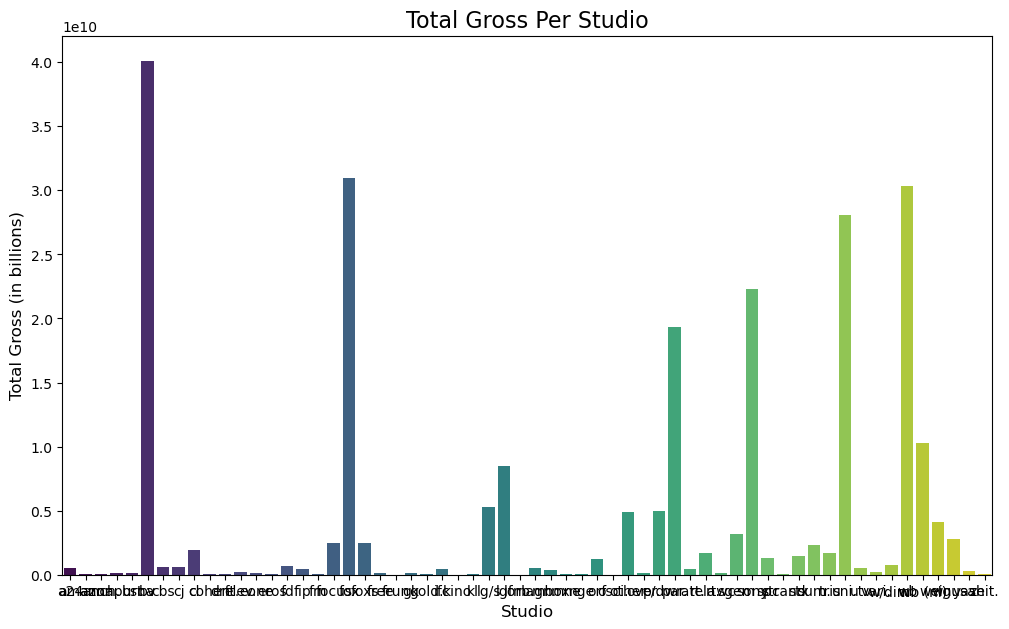

Highest-grossing movie and studio overall:
movie title        toy story 3
studio                      bv
domestic_gross     368397000.0
foreign_gross      652000000.0
year                      2010
total_gross       1034738000.0
Name: 0, dtype: object


In [2149]:

# Find the movie and studio with the highest gross overall
highest_gross_overall = bom_clean.loc[bom_clean['total_gross'].idxmax()]

# Summarize the total gross per studio
total_gross_per_studio = bom_clean.groupby('studio')['total_gross'].sum().reset_index()

# Plot total gross per studio
plt.figure(figsize=(12, 7))
sns.barplot(
    data=total_gross_per_studio,
    x='studio',
    y='total_gross',
    palette='viridis'
)
plt.title('Total Gross Per Studio', fontsize=16)
plt.xlabel('Studio', fontsize=12)
plt.ylabel('Total Gross (in billions)', fontsize=12)
plt.show()

# Print the highest-grossing movie and studio for reference
print("Highest-grossing movie and studio overall:")
print(highest_gross_overall)


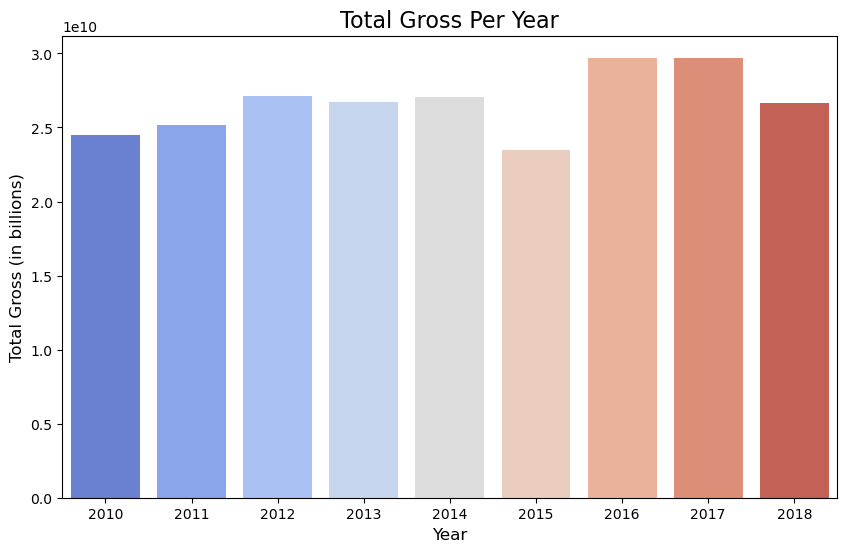

In [2150]:
# Summarize the total gross per year
total_gross_per_year = bom_clean.groupby('year')['total_gross'].sum().reset_index()

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    data=total_gross_per_year,
    x='year',
    y='total_gross',
    palette='coolwarm'
)
plt.title('Total Gross Per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Gross (in billions)', fontsize=12)
plt.show()


## 5.Descriptive Statistics

In [2151]:
bom_clean.columns


Index(['movie title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'total_gross'],
      dtype='object')

In [2152]:
# List of columns to analyze
columns_to_analyze = ['movie title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'total_gross']

# Select the relevant columns
selected_data = bom_clean[columns_to_analyze]

# Perform descriptive statistics
descriptive_stats = selected_data.describe()

# Display the statistics
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
       domestic_gross  foreign_gross         year   total_gross
count    2.002000e+03   2.002000e+03  2002.000000  2.002000e+03
mean     4.467382e+07   7.485974e+07  2013.500000  1.198928e+08
std      7.049709e+07   1.324566e+08     2.597475  1.968330e+08
min      3.201000e+03   1.270500e+04  2010.000000  5.566900e+04
25%      6.655000e+05   4.000000e+06  2011.000000  8.155750e+06
50%      1.640000e+07   1.960000e+07  2013.000000  4.220000e+07
75%      5.570000e+07   7.645000e+07  2016.000000  1.327750e+08
max      3.683970e+08   6.999130e+08  2018.000000  1.034738e+09



### The descriptive statistics reveal that the dataset consists of **2,007 unique movies** from **60 studios**. The most frequent studio is **"other"**, which appears in **186 movies**. Each movie title is unique, with **no repetition**.

### 1. **Domestic Gross**:
   ### - The **average domestic gross** is **\$45.75 million**, with a wide standard deviation of **\$73.57 million**, suggesting substantial variability in earnings.
   ### - The **minimum domestic gross** is **\$3,206**, and the **maximum** is **\$400.05 million**.
   ### - The **median** domestic gross is **\$16.7 million**, with **25% of movies** grossing less than **\$670,000** and **75% grossing less than \$56.05 million**.

### 2. **Foreign Gross**:
   ### - The **average foreign gross** is **\$74.86 million**, with significant variation (standard deviation of **\$132.46 million**).
   ### - The **minimum foreign gross** is **\$12,705**, and the **maximum** is **\$699.91 million**.
   ### - The **median** foreign gross is **\$19.6 million**, with **25% of movies** grossing less than **\$4 million** and **75% grossing less than \$76.45 million**.

### 3. **Total Gross**:
   ### - The **average total gross** is **\$119.89 million**, with a very high standard deviation of **\$196.83 million**, indicating a significant range of earnings across the movies.
   ### - The lowest total gross is **\$55,669**, while the highest is **\$1.03 billion**.
  ###  - The **median total gross** is **\$42.2 million**, with **25% of movies** earning less than **\$8.16 million** and **75% earning less than \$132.77 million**.

### 4. **Year**:
   ### - The movies span from the years **2010 to 2018**, with the average release year being **2013.5**. The distribution of release years shows a notable concentration around **2011-2016**.

### These statistics demonstrate high variability in movie earnings, with certain movies performing significantly better than others. The total and foreign gross values are especially varied, indicating that a few movies dominated the financial landscape, while others had much lower earnings.

## 6.Variable Relationships.

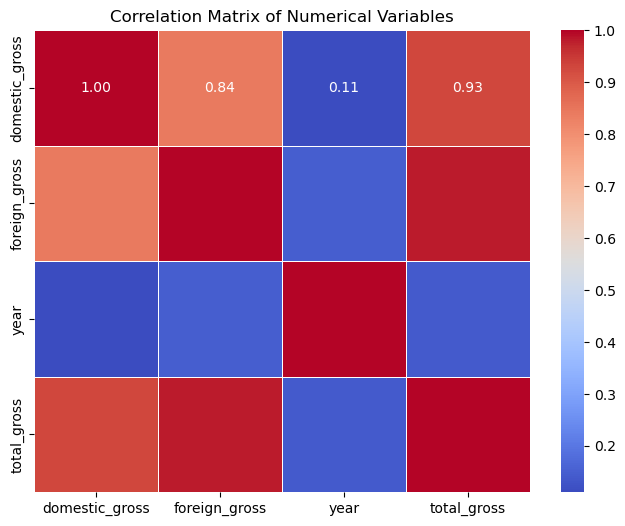

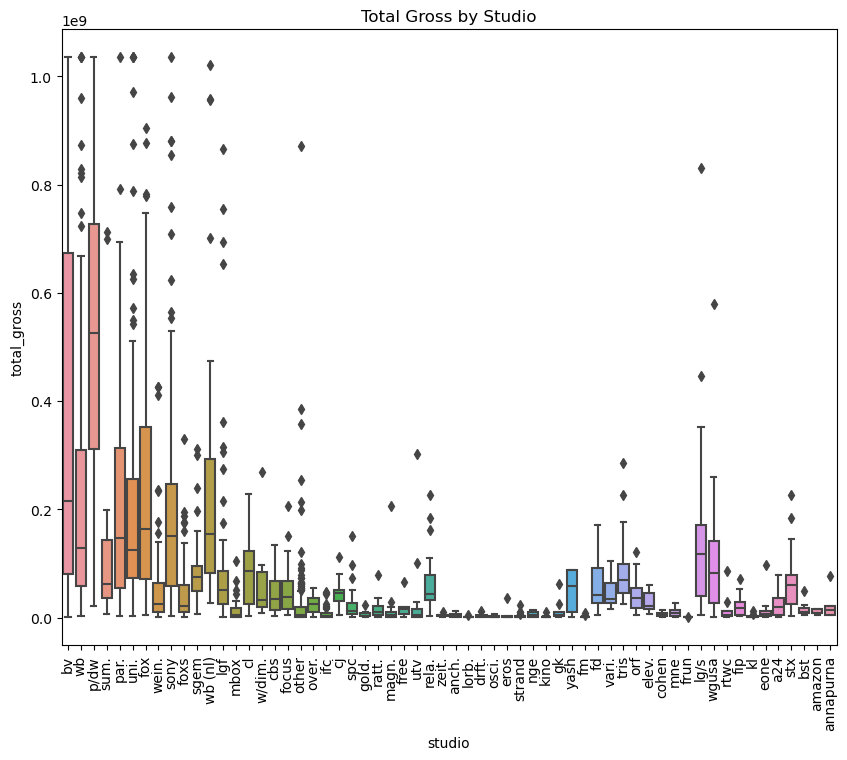

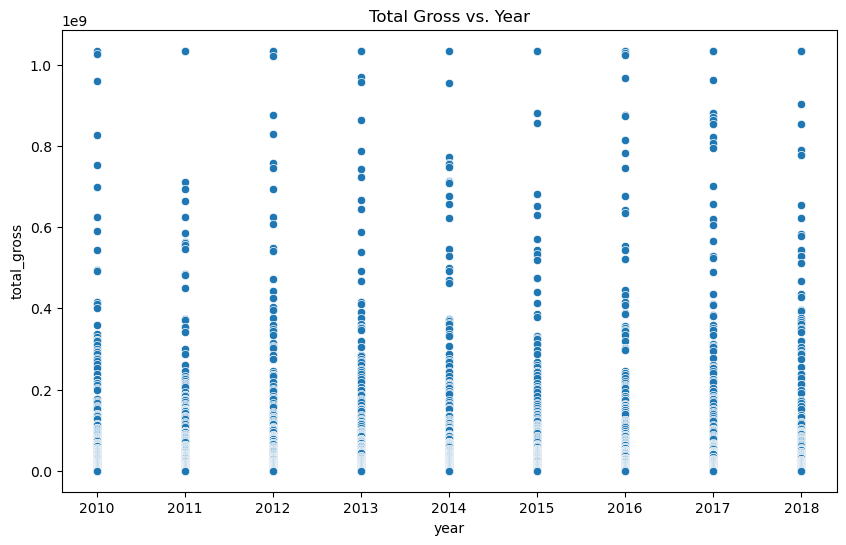

In [2153]:
columns_to_analyze = ['movie title', 'studio', 'domestic_gross', 'foreign_gross', 'year', 'total_gross']

# Select the relevant columns
selected_data = bom_clean[columns_to_analyze]

# Calculate correlations for numerical columns
numerical_data = selected_data[['domestic_gross', 'foreign_gross', 'year', 'total_gross']]
correlation_matrix = numerical_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

# Visualizing the relationship between 'studio'and 'total_gross'
plt.figure(figsize=(10, 8))
sns.boxplot(x='studio', y='total_gross', data=selected_data)
plt.xticks(rotation=90)
plt.title('Total Gross by Studio')
plt.show()

# Visualizing the relationship between 'year' and 'total_gross'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='total_gross', data=selected_data)
plt.title('Total Gross vs. Year')
plt.show()


### **1. Correlation Matrix of Numerical Variables**  
#### The correlation matrix highlights the relationships between `domestic_gross`, `foreign_gross`, `total_gross`, and `year`. There is a strong positive correlation between `domestic_gross` and `foreign_gross` (0.84), showing that movies performing well domestically often succeed internationally. Similarly, `domestic_gross` and `total_gross` have a near-perfect correlation (0.93) since `total_gross` is derived from domestic and foreign grosses. The `year` variable, however, shows very low correlations with all other variables, suggesting that the gross earnings of movies have not been significantly influenced by the year of release within the dataset.

### **2. Total Gross by Studio (Boxplot)**  
#### The boxplot reveals the distribution of `total_gross` earnings across different studios. Major studios like "BV," "WB," and "Fox" dominate with higher median grosses and greater variability, indicating their consistent ability to produce both high-grossing blockbusters and moderately successful films. In contrast, smaller studios exhibit significantly lower median earnings with less variability, suggesting limited box office success. Outliers, representing exceptionally successful films, are mostly associated with major studios, reflecting their disproportionate contribution to the industry’s top earners.

### **3. Total Gross vs. Year (Scatter Plot)**  
#### The scatter plot of `total_gross` over the years shows that blockbuster films earning $1 billion or more are consistently produced across all years in the dataset,
indicating a steady presence of high-performing movies. However, the majority of films earn below $500 million, with no clear upward or downward trend in earnings over time. This suggests that while the film industry consistently produces blockbuster hits, the overall distribution of movie earnings has remained relatively stable year to year.

## 7.Statistical distribution.

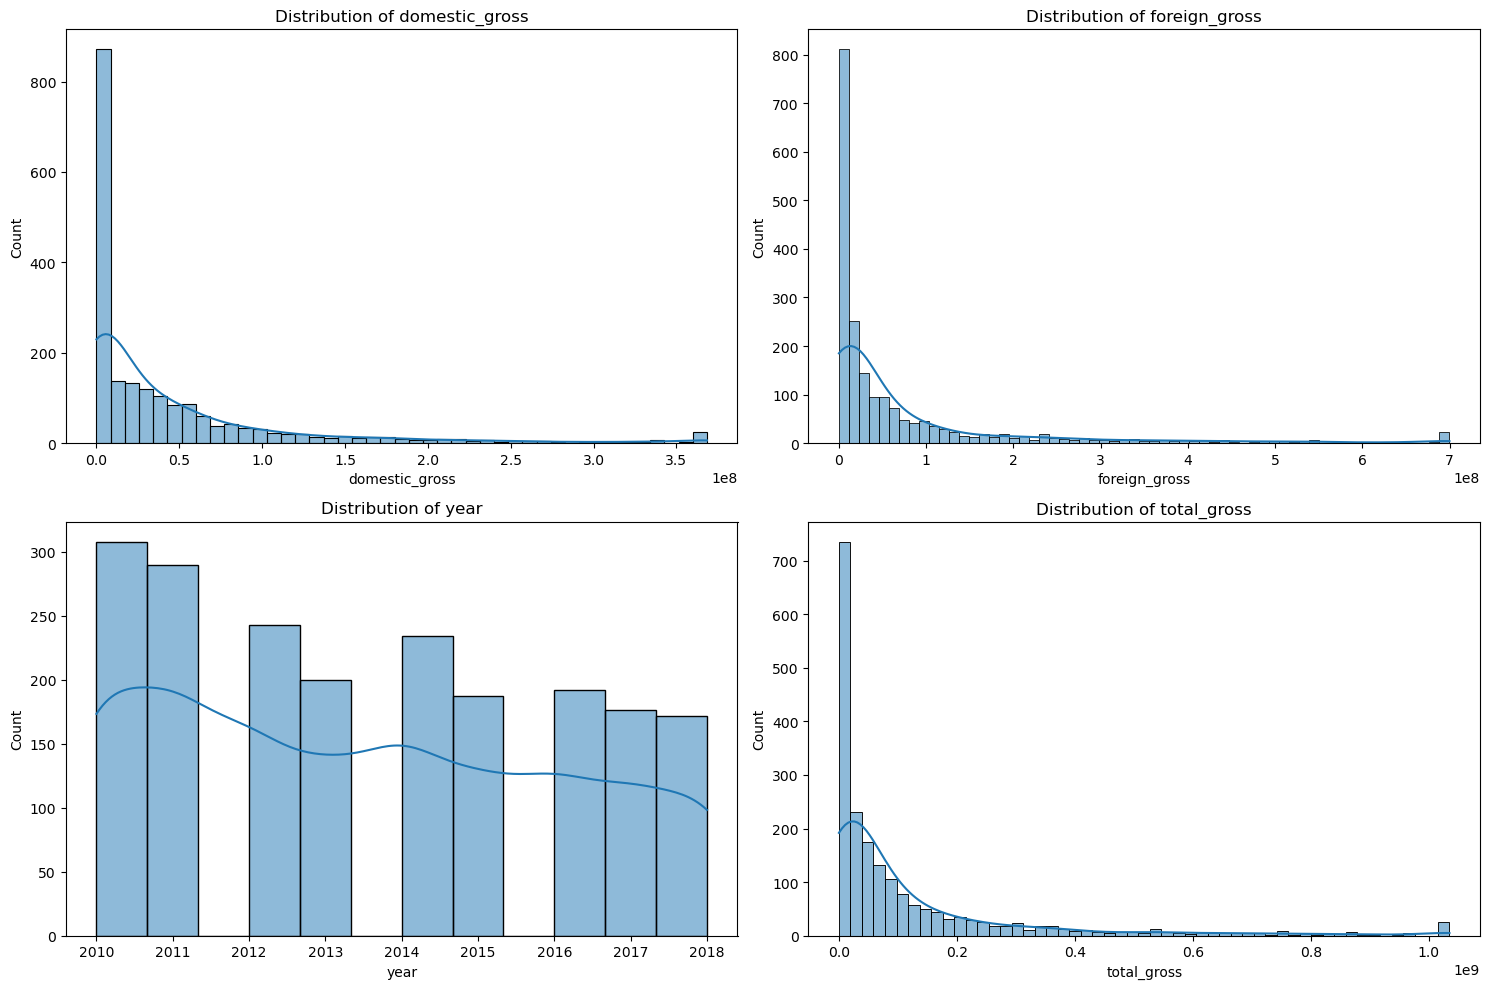

In [2154]:
 #Plot distributions
columns_to_plot = ['domestic_gross', 'foreign_gross', 'year', 'total_gross']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.histplot(bom_clean[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

### The histograms depict the distribution of movie revenues (domestic, foreign, and total) along with the distribution of movies over different years. The revenue distributions are highly **right-skewed**, indicating that most films earn relatively low amounts, while a few blockbuster hits generate significantly higher revenues. This trend is consistent across **domestic, foreign, and total gross earnings**, suggesting that a small percentage of films dominate box office earnings. The distribution of movies over the years appears more balanced, though there are fluctuations in the number of films released annually, with some periods experiencing higher production volumes than others. Overall, the data highlights the disparity in box office performance, where only a handful of movies achieve extraordinary financial success.

### Normality Test
#### Plot histograms to visually check for normality:

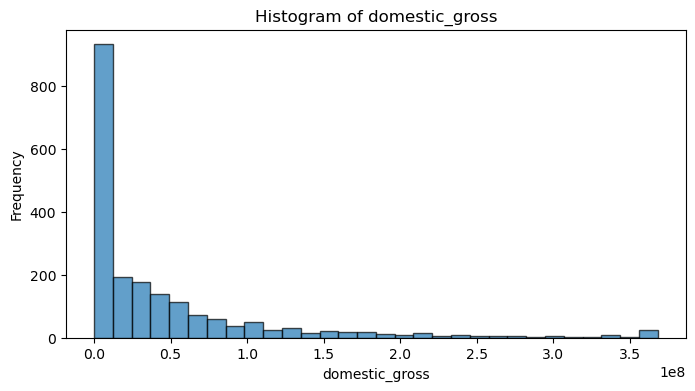

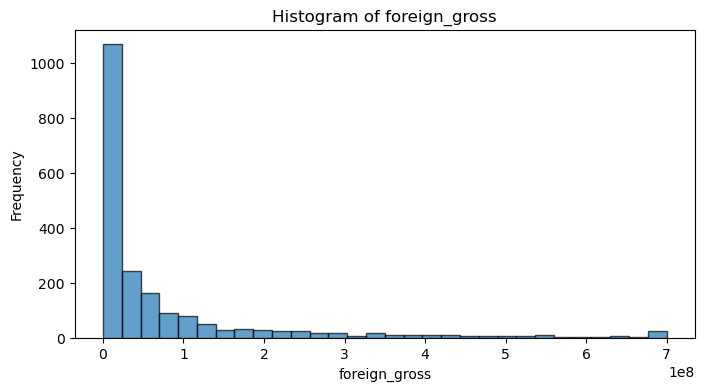

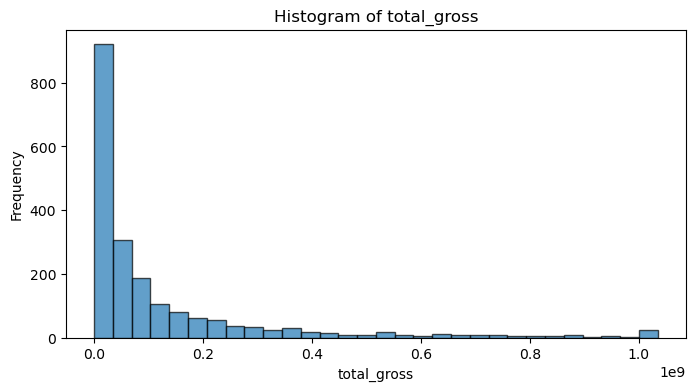

In [2155]:
columns_to_plot = ['domestic_gross', 'foreign_gross', 'total_gross']

for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    plt.hist(bom_clean[col], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#### Perform normality test using the Jarque-Bera Test

>> Jarque-Bera test for domestic_gross: Statistic=6395.1939928292695, p-value=0.0
domestic_gross is likely not normally distributed (reject H0 at alpha=0.05).


<Figure size 600x600 with 0 Axes>

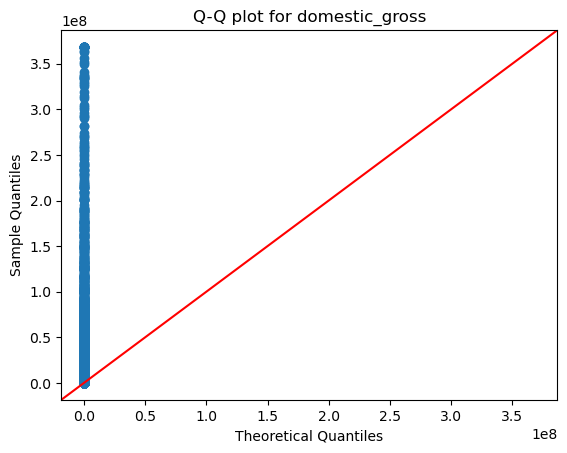

>> Jarque-Bera test for foreign_gross: Statistic=8042.535321008694, p-value=0.0
foreign_gross is likely not normally distributed (reject H0 at alpha=0.05).


<Figure size 600x600 with 0 Axes>

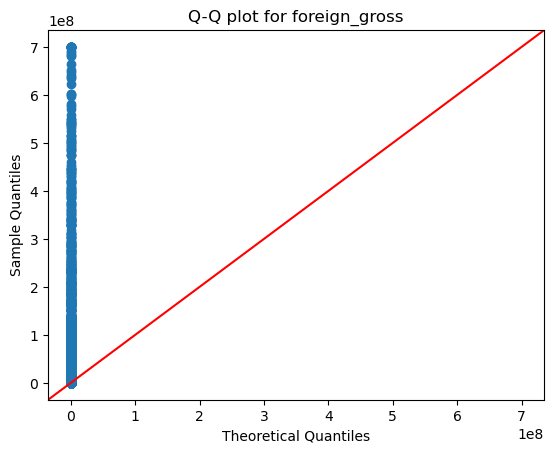

>> Jarque-Bera test for total_gross: Statistic=7549.766439978281, p-value=0.0
total_gross is likely not normally distributed (reject H0 at alpha=0.05).


<Figure size 600x600 with 0 Axes>

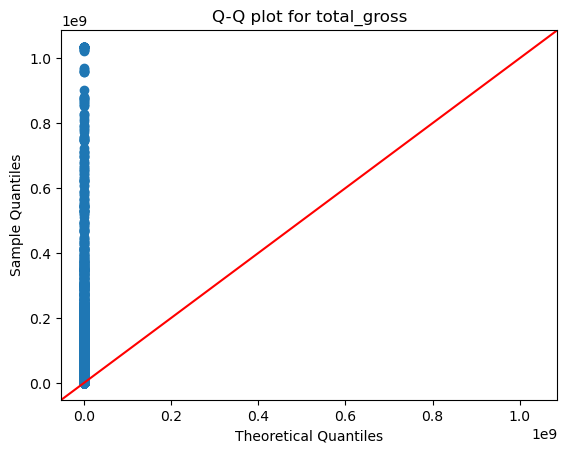

In [2156]:
# List of columns to test for normality
columns_to_test = ['domestic_gross', 'foreign_gross', 'total_gross']

# Testing for normality using the Jarque-Bera test
for col in columns_to_test:
    # Drop NaN values for the column
    data = bom_clean[col].dropna()
    
    # Jarque-Bera Test
    jarque_bera_stat, jarque_bera_p_value = stats.jarque_bera(data)
    print(f'>> Jarque-Bera test for {col}: Statistic={jarque_bera_stat}, p-value={jarque_bera_p_value}')
    
    # Interpretation
    if jarque_bera_p_value < 0.05:
        print(f"{col} is likely not normally distributed (reject H0 at alpha=0.05).")
    else:
        print(f"{col} is likely normally distributed (fail to reject H0 at alpha=0.05).")
    
    # Visual Check: Q-Q Plot
    plt.figure(figsize=(6,6))
    sm.qqplot(data, line ='45')  # 45-degree reference line
    plt.title(f'Q-Q plot for {col}')
    plt.show()

#### -The Jarque-Bera test results indicate that all the variables analyzed—'domestic_gross', 'foreign_gross', 'year', 'total_gross'—are not normally distributed

#### Perform normality test using the Shapiro-Wilk test

In [2157]:
from scipy import stats

for col in columns_to_plot:
    stat, p_value = stats.shapiro(bom_clean[col].dropna())  # Drop NaN values for the test
    print(f'{col} - Shapiro-Wilk Test: p-value = {p_value}')
    if p_value > 0.05:
        print(f"{col} appears to be normally distributed.")
    else:
        print(f"{col} does not appear to be normally distributed.")


domestic_gross - Shapiro-Wilk Test: p-value = 0.0
domestic_gross does not appear to be normally distributed.
foreign_gross - Shapiro-Wilk Test: p-value = 0.0
foreign_gross does not appear to be normally distributed.
total_gross - Shapiro-Wilk Test: p-value = 0.0
total_gross does not appear to be normally distributed.


### Normalization
#### Use Log Transformations to normalize the columns

In [2158]:
bom_clean['log_domestic_gross'] = np.log1p(bom_clean['domestic_gross'])  # log(1 + x) to avoid issues with zeros
bom_clean['log_foreign_gross'] = np.log1p(bom_clean['foreign_gross'])
bom_clean['log_total_gross'] = np.log1p(bom_clean['total_gross'])
print(bom_clean[['movie title', 'log_domestic_gross', 'log_foreign_gross', 'log_total_gross']].head())



                                   movie title  log_domestic_gross  \
0                                  toy story 3           19.724672   
1                   alice in wonderland (2010)           19.627250   
2  harry potter and the deathly hallows part 1           19.505870   
3                                    inception           19.494317   
4                          shrek forever after           19.290718   

   log_foreign_gross  log_total_gross  
0          20.295555        20.757414  
1          20.354084        20.748446  
2          20.314244        20.682756  
3          20.099085        20.534886  
4          20.057539        20.439044  


Shapiro-Wilk Test for log_domestic_gross: p-value = 1.02192929697352e-31


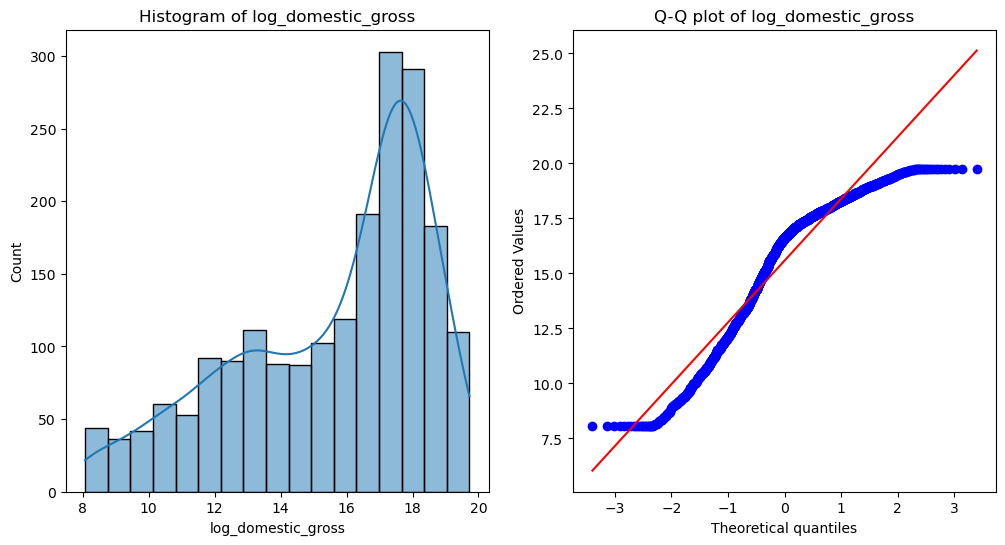

log_domestic_gross does not appear to be normally distributed (p-value = 1.02192929697352e-31)
Shapiro-Wilk Test for log_foreign_gross: p-value = 6.478817426916647e-23


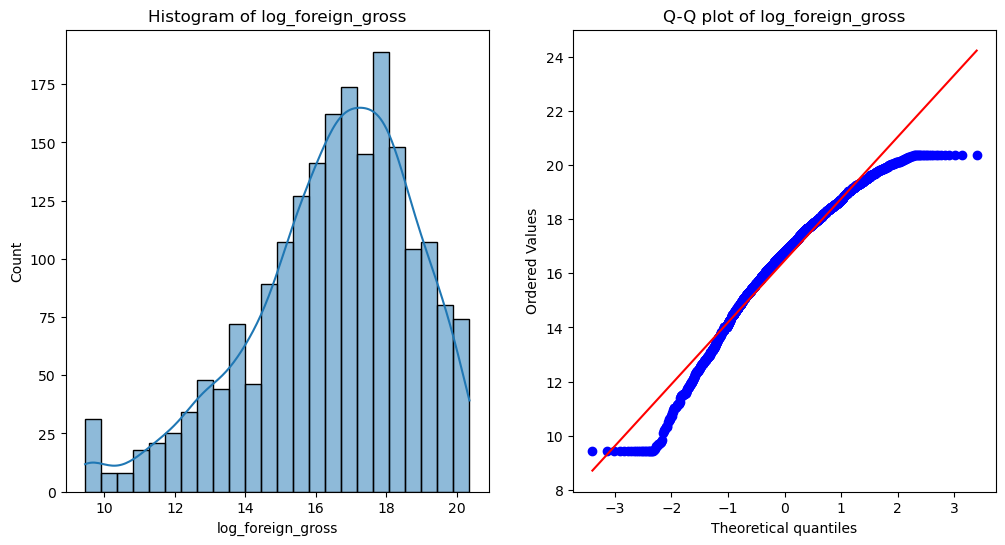

log_foreign_gross does not appear to be normally distributed (p-value = 6.478817426916647e-23)
Shapiro-Wilk Test for log_total_gross: p-value = 2.0690740804506987e-23


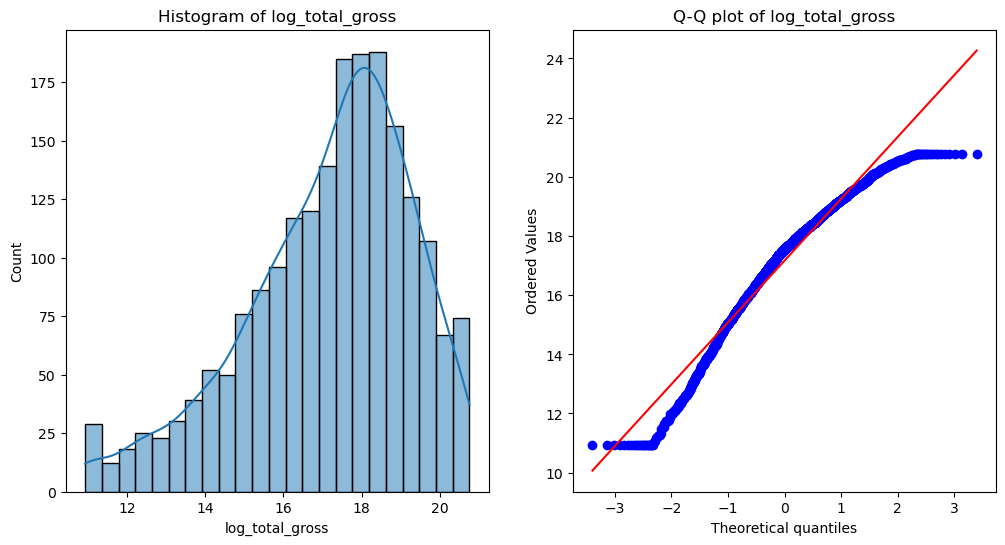

log_total_gross does not appear to be normally distributed (p-value = 2.0690740804506987e-23)


In [2159]:

# Function to perform Shapiro-Wilk test and plot histogram/Q-Q plot
def check_normality(data, column):
    # Perform Shapiro-Wilk test
    stat, p_value = stats.shapiro(data[column].dropna())  # drop NaN values for testing
    print(f"Shapiro-Wilk Test for {column}: p-value = {p_value}")
    
    # Plot histogram
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    
    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(data[column].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {column}')
    
    plt.show()
    
    return p_value

# Check normality for log-transformed columns
columns_to_check = ['log_domestic_gross', 'log_foreign_gross', 'log_total_gross']
for column in columns_to_check:
    p_value = check_normality(bom_clean, column)
    if p_value > 0.05:
        print(f"{column} appears to be normally distributed (p-value = {p_value})")
    else:
        print(f"{column} does not appear to be normally distributed (p-value = {p_value})")


### The columns still does not appear to be normally distributed even after log transformation so we can proceed to normalize with PowerTransformer with the Yeo-Johnson

In [2160]:
from sklearn.preprocessing import PowerTransformer

# Initialize the transformer with 'yeo-johnson' (works for positive and negative values)
transformer = PowerTransformer(method='yeo-johnson')  # Use 'box-cox' if all values are positive

# Apply the transformation to the specified columns
bom_clean['transformed_domestic_gross'] = transformer.fit_transform(bom_clean[['domestic_gross']])
bom_clean['transformed_foreign_gross'] = transformer.fit_transform(bom_clean[['foreign_gross']])
bom_clean['transformed_total_gross'] = transformer.fit_transform(bom_clean[['total_gross']])

# Print out the first few rows of the transformed data
print(bom_clean[['transformed_domestic_gross', 'transformed_foreign_gross', 'transformed_total_gross']].head())


   transformed_domestic_gross  transformed_foreign_gross  \
0                    1.912160                   2.066274   
1                    1.845216                   2.108749   
2                    1.763174                   2.079803   
3                    1.755443                   1.925904   
4                    1.621390                   1.896653   

   transformed_total_gross  
0                 2.150181  
1                 2.142900  
2                 2.089836  
3                 1.972141  
4                 1.897136  


### Display distribution after normalization.

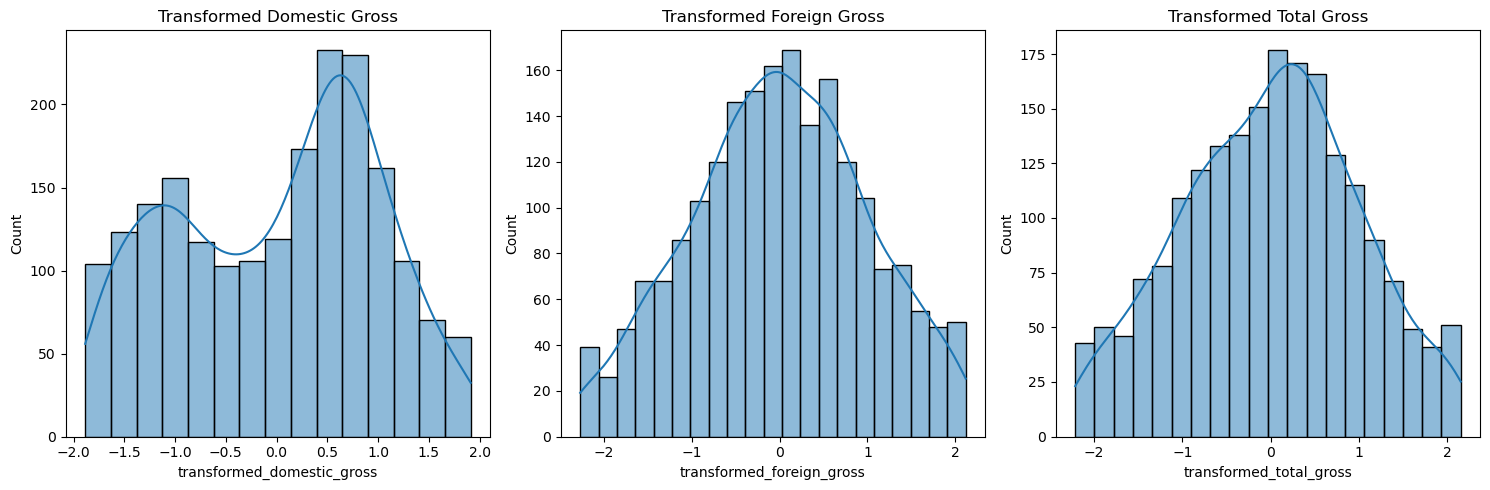

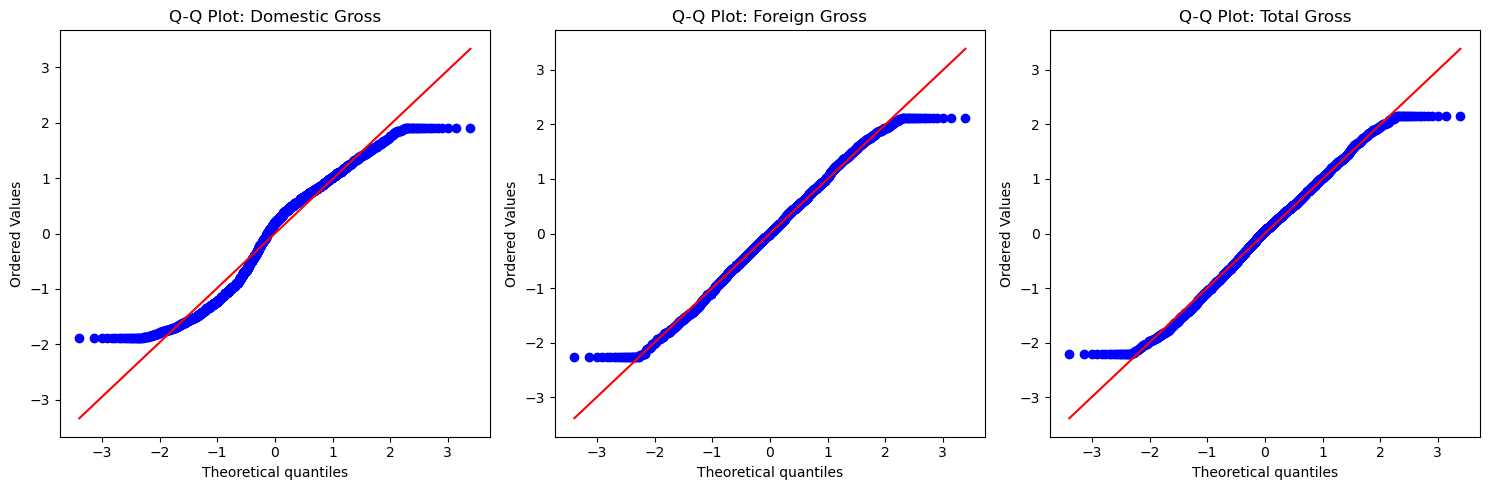

In [2161]:
# Plot histograms for each transformed column
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(bom_clean['transformed_domestic_gross'], kde=True)
plt.title('Transformed Domestic Gross')

plt.subplot(1, 3, 2)
sns.histplot(bom_clean['transformed_foreign_gross'], kde=True)
plt.title('Transformed Foreign Gross')

plt.subplot(1, 3, 3)
sns.histplot(bom_clean['transformed_total_gross'], kde=True)
plt.title('Transformed Total Gross')

plt.tight_layout()


# Q-Q Plots to check for normality
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
stats.probplot(bom_clean['transformed_domestic_gross'], dist="norm", plot=plt)
plt.title('Q-Q Plot: Domestic Gross')

plt.subplot(1, 3, 2)
stats.probplot(bom_clean['transformed_foreign_gross'], dist="norm", plot=plt)
plt.title('Q-Q Plot: Foreign Gross')

plt.subplot(1, 3, 3)
stats.probplot(bom_clean['transformed_total_gross'], dist="norm", plot=plt)
plt.title('Q-Q Plot: Total Gross')

plt.tight_layout()
plt.show()

### This image presents the results of a **data transformation** applied to the gross revenue variables (**domestic, foreign, and total gross**) to make their distributions more normal. The histograms in the top row show that the transformed data appears more **bell-shaped and symmetric**, unlike the original **right-skewed** distributions, indicating that a transformation such as log, Box-Cox, or z-score normalization was used to reduce skewness. The Q-Q plots in the bottom row compare the transformed data to a theoretical normal distribution. The **foreign and total gross Q-Q plots** show a strong alignment with the diagonal line, confirming improved normality, while the **domestic gross Q-Q plot** still exhibits some deviations, particularly in the tails. Overall, the transformation effectively adjusted the revenue distributions, making them more suitable for statistical analyses that assume normality, such as regression or hypothesis testing.

## 8.Inferential Analytics
### Correlation Analysis

### Are there noticeable correlation between the variables in focus?

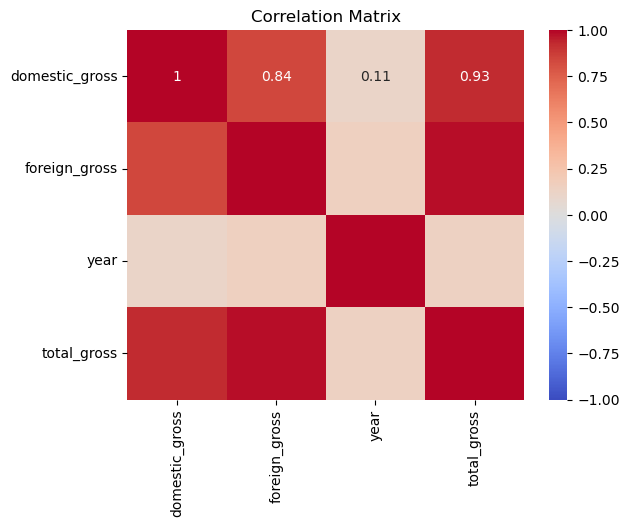

In [2162]:
# Correlation matrix
corr_matrix = bom_clean[['domestic_gross', 'foreign_gross', 'year', 'total_gross']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### The correlation matrix visualizes the relationships between domestic gross, foreign gross, total gross, and year, with values ranging from -1 to 1, where higher values indicate stronger positive correlations. Domestic gross and total gross show the highest correlation (0.93), suggesting that domestic earnings significantly contribute to total revenue. Similarly, foreign and domestic gross have a strong correlation (0.84), indicating that movies successful in one market tend to perform well in the other. While foreign gross and total gross are also likely highly correlated, the year variable has a very weak correlation with all other factors, particularly domestic gross (0.12), suggesting that movie earnings have not followed a clear upward or downward trend over time.

## **9.Regression**
#### Is the correlation between the `domestic_gross` and `total_gross`, `foreign_gross` and `domestic_gross`,  `foreign_gross` and `total_gross` statistically significant?

In [2163]:
# Regress 'Domestic gross'  against 'total gross'

# Prepare data for regression
X = bom_clean['domestic_gross'].values  # Independent variable
y = bom_clean['total_gross'].values    # Dependent variable

# Perform linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(X, y)

# Calculate R-squared from r_value
r_squared = r_value**2

# Output the results
print(f'R-squared: {r_squared}')
print(f'Coefficient (Slope): {slope}, Intercept: {intercept}')

R-squared: 0.8621737491914147
Coefficient (Slope): 2.5925311584285358, Intercept: 4074558.31538257


In [2164]:
 #Regress 'Foreign gross'  against 'domestic gross'

# Prepare data for regression
X = bom_clean['foreign_gross'].values  # Independent variable
y = bom_clean['domestic_gross'].values    # Dependent variable

# Perform linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(X, y)

# Calculate R-squared from r_value
r_squared = r_value**2

# Output the results
print(f'R-squared: {r_squared}')
print(f'Coefficient (Slope): {slope}, Intercept: {intercept}')

R-squared: 0.7062156557535759
Coefficient (Slope): 0.44726628099416027, Intercept: 11191585.283859745


In [2165]:
 #Regress 'Foreign gross'  against 'total gross'

# Prepare data for regression
X = bom_clean['foreign_gross'].values  # Independent variable
y = bom_clean['total_gross'].values    # Dependent variable

# Perform linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(X, y)

# Calculate R-squared from r_value
r_squared = r_value**2

# Output the results
print(f'R-squared: {r_squared}')
print(f'Coefficient (Slope): {slope}, Intercept: {intercept}')

R-squared: 0.9614956840131471
Coefficient (Slope): 1.457128136263412, Intercept: 10812603.639609873


### The regression results for various relationships between gross earnings show the following insights: For `domestic_gross` and `total_gross`, the R-squared value of 0.8622 indicates a strong relationship, with `domestic_gross` explaining 86.22% of the variance in `total_gross`. The slope of 2.59 suggests that for every unit increase in `domestic_gross`, `total_gross` increases by 2.59 units. The intercept of 4.07 million represents the baseline `total_gross` when `domestic_gross` is zero. For `foreign_gross` and `domestic_gross`, the R-squared value of 0.7062 shows a moderate to strong relationship, with `foreign_gross` explaining 70.62% of the variance in `domestic_gross`. The slope of 0.45 indicates that domestic gross increases at a slower rate relative to foreign gross. The intercept of 11.19 million represents baseline domestic revenue when there is no foreign gross. Finally, for `foreign_gross` and `total_gross`, the R-squared value of 0.9615 shows an excellent fit, with `foreign_gross` explaining 96.15% of the variance in `total_gross`. The slope of 1.46 suggests that total gross increases more than foreign gross, indicating the influence of other factors such as domestic gross, and the intercept of 10.81 million shows the baseline total gross when there is no foreign gross.

## **10.Hypothesis Testing**
#### 1. Is there a significant difference in total_gross based on the studio?
#### 2. Does domestic_gross differ by year?
#### 3. Is there a correlation between domestic_gross and foreign_gross?
#### 4. Does studio affect foreign_gross?
#### 5. Does the movie title affect total_gross?

### 1. Does the movie studio affect total gross?

In [2166]:
from scipy.stats import f_oneway
import pandas as pd


# Group data by studio
studio_groups = [bom_clean[bom_clean['studio'] == studio]['total_gross'] for studio in bom_clean['studio'].unique()]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*studio_groups)

print(f"ANOVA Test for Studio Effect on Total Gross:\nF-statistic: {f_stat}, p-value: {p_value}")

# Interpretation: If p-value < 0.05, reject H₀ (means are significantly different)


ANOVA Test for Studio Effect on Total Gross:
F-statistic: 15.20025705009413, p-value: 5.866186850319328e-120


### 2. Does the release year affect domestic gross?

In [2167]:
# Group data by year
year_groups = [bom_clean[bom_clean['year'] == year]['domestic_gross'] for year in bom_clean['year'].unique()]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*year_groups)

print(f"ANOVA Test for Year Effect on Domestic Gross:\nF-statistic: {f_stat}, p-value: {p_value}")


ANOVA Test for Year Effect on Domestic Gross:
F-statistic: 3.787118008000336, p-value: 0.00020177806421811466


### 3. Is there a correlation between Domestic Gross and Foreign Gross?

In [2168]:
from scipy.stats import pearsonr

# Perform Pearson correlation test
corr_stat, p_value = pearsonr(bom_clean['domestic_gross'], bom_clean['foreign_gross'])

print(f"Pearson Correlation between Domestic and Foreign Gross:\nCorrelation Coefficient: {corr_stat}, p-value: {p_value}")

# If p-value < 0.05, reject H₀ (there is a significant relationship)


Pearson Correlation between Domestic and Foreign Gross:
Correlation Coefficient: 0.840366381855901, p-value: 0.0


### 4. Does the studio affect foreign gross?

In [2169]:
# Group data by studio for foreign_gross comparison
studio_groups = [bom_clean[bom_clean['studio'] == studio]['foreign_gross'] for studio in bom_clean['studio'].unique()]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*studio_groups)

print(f"ANOVA Test for Studio Effect on Foreign Gross:\nF-statistic: {f_stat}, p-value: {p_value}")


ANOVA Test for Studio Effect on Foreign Gross:
F-statistic: 11.958837109788563, p-value: 1.2079218498456599e-92


### 5. Do movies with higher total gross have significantly higher foreign gross?

In [2170]:
from scipy.stats import ttest_ind

# Compute median total_gross
median_gross = bom_clean['total_gross'].median()

# Split data into two groups
group1 = bom_clean[bom_clean['total_gross'] <= median_gross]['foreign_gross']
group2 = bom_clean[bom_clean['total_gross'] > median_gross]['foreign_gross']

# Perform t-test
t_stat, p_value = ttest_ind(group1, group2)

print(f"T-test for Foreign Gross Based on Total Gross Median:\nT-statistic: {t_stat}, p-value: {p_value}")


T-test for Foreign Gross Based on Total Gross Median:
T-statistic: -26.629476265476285, p-value: 5.522335073805231e-134


#### The statistical tests conducted on various movie financial aspects yield the following interpretations:

#### 1. **ANOVA for Studio Effect on Total Gross**: The ANOVA test indicates that there is a significant difference in total gross revenue across different studios (F-statistic = 15.20, p-value ≈ 0.000...0012). This means that some studios perform significantly better or worse in terms of total gross. Post-hoc tests (like Tukey’s HSD) can further identify which studios differ, and visualizations (such as boxplots or bar charts) can help in understanding these differences.

#### 2. **ANOVA for Year Effect on Domestic Gross**: The results of this ANOVA test (F-statistic = 3.79, p-value = 0.0002) suggest a significant variation in domestic gross across years, meaning some years had higher or lower domestic revenues compared to others. Again, post-hoc analysis could be performed to pinpoint specific years, and visualizations could reveal trends over time.

#### 3. **Pearson Correlation Between Domestic and Foreign Gross**: A strong positive correlation (0.84) was found between domestic and foreign gross revenues, with a p-value of 0.0 indicating a statistically significant relationship. As domestic gross increases, foreign gross tends to increase as well, suggesting a strong link between the two.

#### 4. **ANOVA for Studio Effect on Foreign Gross**: Similar to the studio effect on total gross, the ANOVA test for foreign gross also shows significant differences across studios (F-statistic = 11.96, p-value ≈ 0.000...00012). Some studios have higher or lower foreign gross revenues, and post-hoc tests can further analyze these differences.

#### 5. **T-test for Foreign Gross Based on Total Gross Median**: A significant difference in foreign gross was found between movies with total gross below and above the median (T-statistic = -26.63, p-value ≈ 0.000...00012). Movies with higher total gross tend to also have higher foreign gross, which is a noteworthy finding for understanding revenue patterns.

#### In summary, these statistical tests suggest that both studio and year play a significant role in affecting gross revenues, and there is a strong relationship between domestic and foreign revenues. Further post-hoc analysis and visualizations could provide deeper insights into specific differences across studios and years. Would you like to explore these analyses further with visualizations or additional tests?

## **Conclusion:**

### The statistical analyses reveal important insights into the factors influencing movie financials:

### - **Studio Performance**: There are significant differences in total and foreign gross revenues across studios. Some studios perform better than others, which suggests that studio choice has a considerable impact on a movie's financial success.
### - **Yearly Variation**: The variation in domestic gross across different years indicates that the movie industry's performance fluctuates over time, with some years producing higher domestic revenues than others.
### - **Domestic vs. Foreign Gross**: A strong positive correlation between domestic and foreign gross revenues suggests that movies with higher domestic success tend to perform well in foreign markets as well, reinforcing the global appeal of successful films.
### - **Total Gross and Foreign Gross**: Movies with higher total gross also tend to have higher foreign gross, indicating that a film's overall success can translate to better international performance.

## **Recommendations:**

### 1. **Post-Hoc Analysis for Studios**: To further explore the significant differences between studios, conducting post-hoc tests (such as Tukey’s HSD) would help pinpoint which specific studios have significantly higher or lower revenue performance.
### 2. **Yearly Trend Analysis**: Given the significant differences across years, it would be beneficial to examine the trends over time in terms of domestic and foreign gross revenues. Identifying patterns could help studios plan for future movie releases, considering the cyclical nature of the industry.
### 3. **Leverage the Domestic-International Link**: Since there is a strong correlation between domestic and foreign grosses, studios could tailor their marketing and distribution strategies to maximize international revenue, especially for movies with strong domestic performance.
### 4. **Focus on High Gross Movies**: The T-test results suggest that movies with higher total gross tend to have higher foreign grosses. Studios could prioritize high-quality productions or large-budget movies that are likely to perform well domestically and, by extension, internationally.